The following code is from
[Link](https://github.com/justinbois/rdsolver/blob/master/notebooks/asdm_example.ipynb)

In [3]:
import numpy as np
import numba
import scipy.integrate
from matplotlib import pyplot as plt

import rdsolver

In [4]:
D, beta, gamma, f, f_args, homo_ss = rdsolver.models.asdm()

In [3]:
D

array([0.005, 0.2  ])

In [4]:
beta

array([0.  , 0.02])

In [5]:
gamma

array([[-0.01,  0.  ],
       [ 0.  ,  0.  ]])

In [6]:
#f()
# rho_a, rho_s, kappa_a
f_args

(0.01, 0.02, 0.25)

In [7]:
homo_ss

array([1.  , 1.25])

In [33]:
# Load a standard ASDM model
D, beta, gamma, f, f_args, homo_ss = rdsolver.models.asdm()

# Set up the space and time grid
n = (32, 32)
L = (50, 50)
t = np.linspace(0, 400, 256)
        
# Include the estimated params
D_a = 1.0#0.01558*const1#0.005
D_s = 40.0#0.03886*const2#0.2
D[0] = D_a # D_a
D[1] = D_s # D_s
beta[0] =  0.03437913#0.00040#0.00097*const1# sigma_a
beta[1] = 0.4#0.3837675302024302#0.01521#0.00345*const2 # sigma_s
gamma[0,0] = -0.49168766#-0.01046#-0.03316*const1#mu_a
#gamma[1,1] = 0.0 #mu_s
# rho_a,  rho_s, kappa_a
#f_args = (0.03253*const1, 0.00374*const2, 0.25216)
#f_args = (0.00997, 0.01615, 0.25453)
f_args = (0.580389, 0.831942, 0.00002313)
#f_args = (f_args[0], f_args[1], 0.19742522)


# Initial condition and solve
c0 = rdsolver.initial_condition(uniform_conc=homo_ss, n=n, L=L)
c = rdsolver.solve(c0, t, D=D, beta=beta, gamma=gamma, f=f, f_args=f_args, L=L)

# Interpolate the solution
#c_interp = rdsolver.viz.interpolate_concs(c)

100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [00:26<00:00,  9.77it/s]


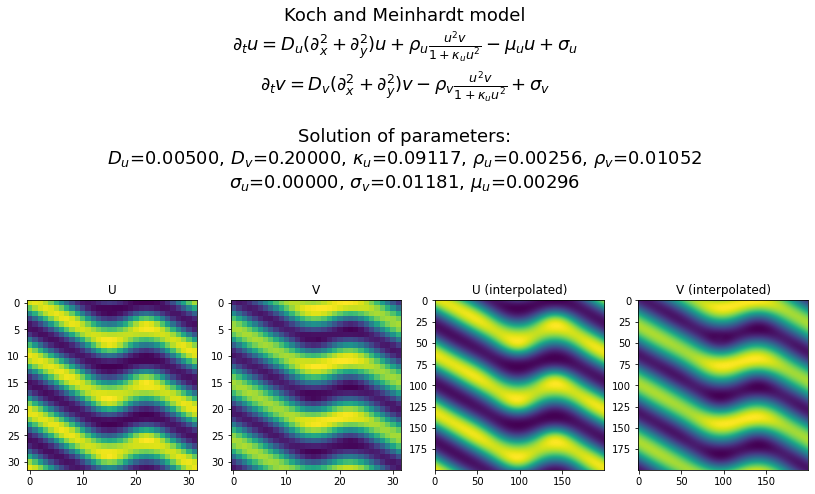

In [47]:
_ = plt.figure(figsize=(14,11))
# Direct solution
plt.suptitle("Koch and Meinhardt model\n"
             r"$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + \rho_u \frac{u^2 v}{1 + \kappa_u u^2} - \mu_u u + \sigma_u$"
             "\n"
             r"$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v - \rho_v \frac{u^2 v}{1 + \kappa_u u^2} + \sigma_v$"
             "\n"
             "\n"
             "Solution of parameters:\n"             
             r"$D_u$="
             f"{D_a:.5f}"
             r", $D_v$="
             f"{D_s:.5f}"
             r", $\kappa_u$="
             f"{f_args[2]:.5f}"
             r", $\rho_u$="
             f"{f_args[0]:.5f}"
             r", $\rho_v$="
             f"{f_args[1]:.5f}"
             "\n"
             r"$\sigma_u$="
             f"{beta[0]:.5f}"
             r", $\sigma_v$="
             f"{beta[1]:.5f}"
             r", $\mu_u$="
             f"{-gamma[0,0]:.5f}", fontsize=18)
plt.subplot(141)
plt.title("U")
plt.imshow(c[0, :,:,-1])
plt.subplot(142)
plt.title("V")
plt.imshow(c[1, :,:,-1])
# Interpolated solutions
plt.subplot(143)
plt.title("U (interpolated)")
plt.imshow(c_interp[0, :,:,-1])
plt.subplot(144)
plt.title("V (interpolated)")
plt.imshow(c_interp[1, :,:,-1])
plt.show()

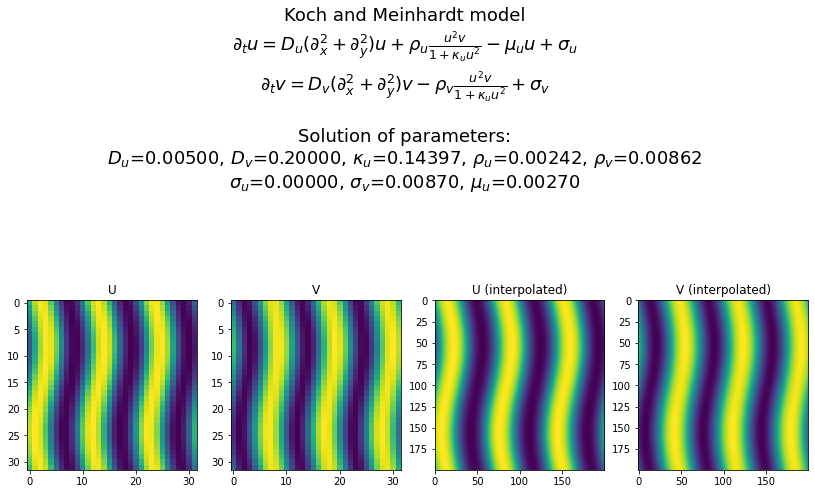

In [39]:
_ = plt.figure(figsize=(14,11))
# Direct solution
plt.suptitle("Koch and Meinhardt model\n"
             r"$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + \rho_u \frac{u^2 v}{1 + \kappa_u u^2} - \mu_u u + \sigma_u$"
             "\n"
             r"$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v - \rho_v \frac{u^2 v}{1 + \kappa_u u^2} + \sigma_v$"
             "\n"
             "\n"
             "Solution of parameters:\n"             
             r"$D_u$="
             f"{D_a:.5f}"
             r", $D_v$="
             f"{D_s:.5f}"
             r", $\kappa_u$="
             f"{f_args[2]:.5f}"
             r", $\rho_u$="
             f"{f_args[0]:.5f}"
             r", $\rho_v$="
             f"{f_args[1]:.5f}"
             "\n"
             r"$\sigma_u$="
             f"{beta[0]:.5f}"
             r", $\sigma_v$="
             f"{beta[1]:.5f}"
             r", $\mu_u$="
             f"{-gamma[0,0]:.5f}", fontsize=18)
plt.subplot(141)
plt.title("U")
plt.imshow(c[0, :,:,-1])
plt.subplot(142)
plt.title("V")
plt.imshow(c[1, :,:,-1])
# Interpolated solutions
plt.subplot(143)
plt.title("U (interpolated)")
plt.imshow(c_interp[0, :,:,-1])
plt.subplot(144)
plt.title("V (interpolated)")
plt.imshow(c_interp[1, :,:,-1])
plt.show()

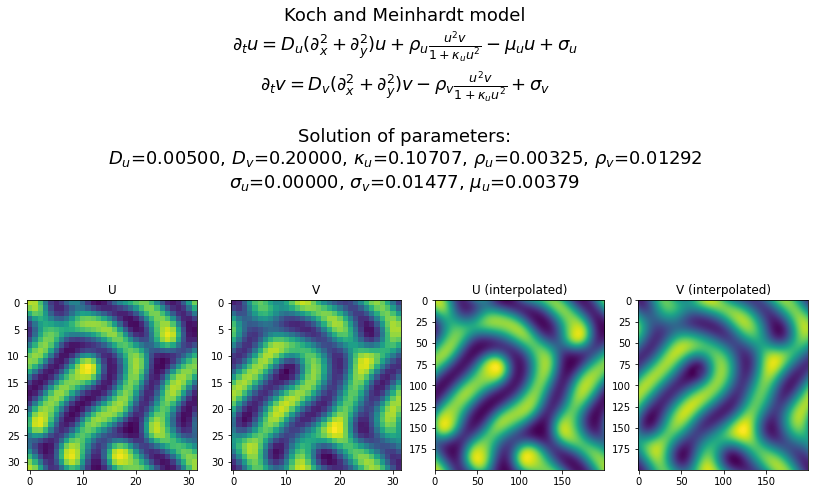

In [35]:
_ = plt.figure(figsize=(14,11))
# Direct solution
plt.suptitle("Koch and Meinhardt model\n"
             r"$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + \rho_u \frac{u^2 v}{1 + \kappa_u u^2} - \mu_u u + \sigma_u$"
             "\n"
             r"$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v - \rho_v \frac{u^2 v}{1 + \kappa_u u^2} + \sigma_v$"
             "\n"
             "\n"
             "Solution of parameters:\n"             
             r"$D_u$="
             f"{D_a:.5f}"
             r", $D_v$="
             f"{D_s:.5f}"
             r", $\kappa_u$="
             f"{f_args[2]:.5f}"
             r", $\rho_u$="
             f"{f_args[0]:.5f}"
             r", $\rho_v$="
             f"{f_args[1]:.5f}"
             "\n"
             r"$\sigma_u$="
             f"{beta[0]:.5f}"
             r", $\sigma_v$="
             f"{beta[1]:.5f}"
             r", $\mu_u$="
             f"{-gamma[0,0]:.5f}", fontsize=18)
plt.subplot(141)
plt.title("U")
plt.imshow(c[0, :,:,-1])
plt.subplot(142)
plt.title("V")
plt.imshow(c[1, :,:,-1])
# Interpolated solutions
plt.subplot(143)
plt.title("U (interpolated)")
plt.imshow(c_interp[0, :,:,-1])
plt.subplot(144)
plt.title("V (interpolated)")
plt.imshow(c_interp[1, :,:,-1])
plt.show()

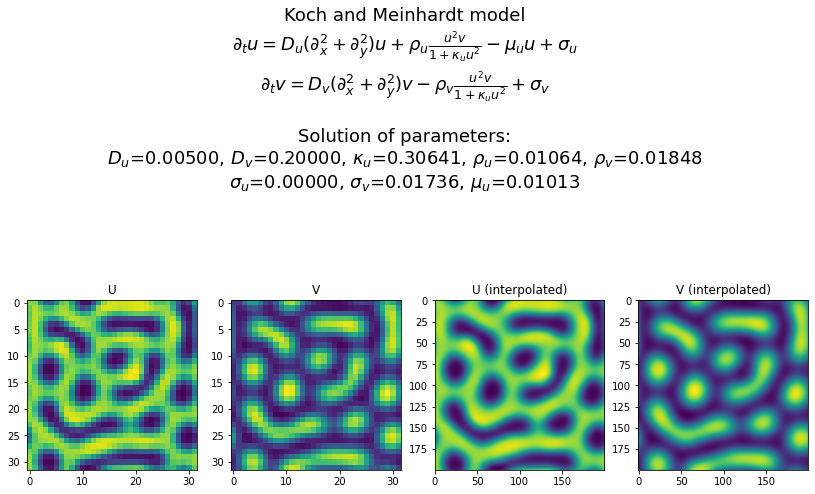

In [51]:
_ = plt.figure(figsize=(14,11))
# Direct solution
plt.suptitle("Koch and Meinhardt model\n"
             r"$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + \rho_u \frac{u^2 v}{1 + \kappa_u u^2} - \mu_u u + \sigma_u$"
             "\n"
             r"$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v - \rho_v \frac{u^2 v}{1 + \kappa_u u^2} + \sigma_v$"
             "\n"
             "\n"
             "Solution of parameters:\n"             
             r"$D_u$="
             f"{D_a:.5f}"
             r", $D_v$="
             f"{D_s:.5f}"
             r", $\kappa_u$="
             f"{f_args[2]:.5f}"
             r", $\rho_u$="
             f"{f_args[0]:.5f}"
             r", $\rho_v$="
             f"{f_args[1]:.5f}"
             "\n"
             r"$\sigma_u$="
             f"{beta[0]:.5f}"
             r", $\sigma_v$="
             f"{beta[1]:.5f}"
             r", $\mu_u$="
             f"{-gamma[0,0]:.5f}", fontsize=18)
plt.subplot(141)
plt.title("U")
plt.imshow(c[0, :,:,-1])
plt.subplot(142)
plt.title("V")
plt.imshow(c[1, :,:,-1])
# Interpolated solutions
plt.subplot(143)
plt.title("U (interpolated)")
plt.imshow(c_interp[0, :,:,-1])
plt.subplot(144)
plt.title("V (interpolated)")
plt.imshow(c_interp[1, :,:,-1])
plt.show()

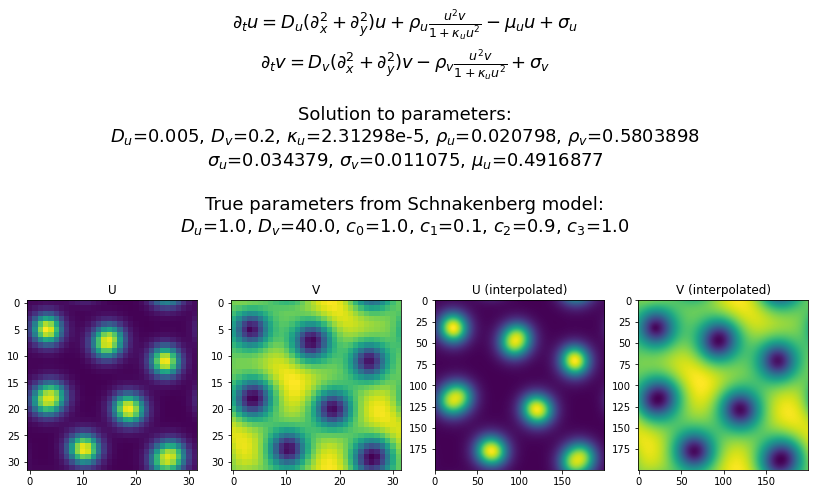

In [11]:
_ = plt.figure(figsize=(14,11))
# Direct solution
plt.suptitle(r"$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + \rho_u \frac{u^2 v}{1 + \kappa_u u^2} - \mu_u u + \sigma_u$"
             "\n"
             r"$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v - \rho_v \frac{u^2 v}{1 + \kappa_u u^2} + \sigma_v$"
             "\n"
             "\n"
             "Solution to parameters:\n" 
             r"$D_u$=0.005, $D_v$=0.2, $\kappa_u$=2.31298e-5, $\rho_u$=0.020798, $\rho_v$=0.5803898"
             "\n"
             r"$\sigma_u$=0.034379, $\sigma_v$=0.011075, $\mu_u$=0.4916877"
             "\n"
             "\n"
             "True parameters from Schnakenberg model:\n" 
             r"$D_u$=1.0, $D_v$=40.0, $c_0$=1.0, $c_1$=0.1, $c_2$=0.9, $c_3$=1.0", fontsize=18)
plt.subplot(141)
plt.title("U")
plt.imshow(c[0, :,:,-1])
plt.subplot(142)
plt.title("V")
plt.imshow(c[1, :,:,-1])
# Interpolated solutions
plt.subplot(143)
plt.title("U (interpolated)")
plt.imshow(c_interp[0, :,:,-1])
plt.subplot(144)
plt.title("V (interpolated)")
plt.imshow(c_interp[1, :,:,-1])
plt.show()

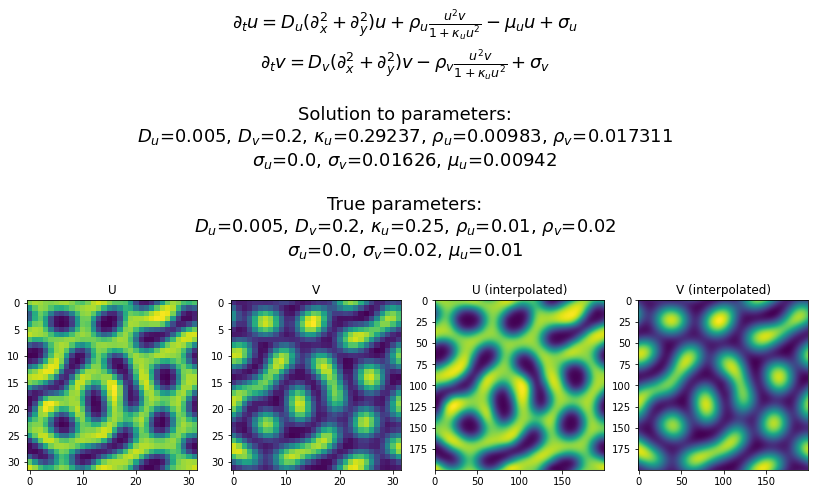

In [32]:
_ = plt.figure(figsize=(14,11))
# Direct solution
plt.suptitle(r"$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + \rho_u \frac{u^2 v}{1 + \kappa_u u^2} - \mu_u u + \sigma_u$"
             "\n"
             r"$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v - \rho_v \frac{u^2 v}{1 + \kappa_u u^2} + \sigma_v$"
             "\n"
             "\n"
             "Solution to parameters:\n" 
             r"$D_u$=0.005, $D_v$=0.2, $\kappa_u$=0.29237, $\rho_u$=0.00983, $\rho_v$=0.017311"
             "\n"
             r"$\sigma_u$=0.0, $\sigma_v$=0.01626, $\mu_u$=0.00942"
             "\n"
             "\n"
             "True parameters:\n" 
             r"$D_u$=0.005, $D_v$=0.2, $\kappa_u$=0.25, $\rho_u$=0.01, $\rho_v$=0.02"
             "\n"
             r"$\sigma_u$=0.0, $\sigma_v$=0.02, $\mu_u$=0.01", fontsize=18)
plt.subplot(141)
plt.title("U")
plt.imshow(c[0, :,:,-1])
plt.subplot(142)
plt.title("V")
plt.imshow(c[1, :,:,-1])
# Interpolated solutions
plt.subplot(143)
plt.title("U (interpolated)")
plt.imshow(c_interp[0, :,:,-1])
plt.subplot(144)
plt.title("V (interpolated)")
plt.imshow(c_interp[1, :,:,-1])
plt.show()

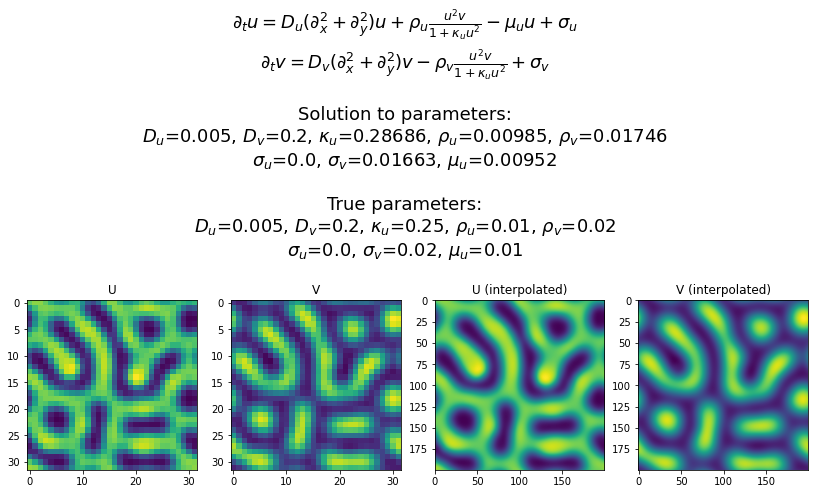

In [29]:
_ = plt.figure(figsize=(14,11))
# Direct solution
plt.suptitle(r"$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + \rho_u \frac{u^2 v}{1 + \kappa_u u^2} - \mu_u u + \sigma_u$"
             "\n"
             r"$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v - \rho_v \frac{u^2 v}{1 + \kappa_u u^2} + \sigma_v$"
             "\n"
             "\n"
             "Solution to parameters:\n" 
             r"$D_u$=0.005, $D_v$=0.2, $\kappa_u$=0.28686, $\rho_u$=0.00985, $\rho_v$=0.01746"
             "\n"
             r"$\sigma_u$=0.0, $\sigma_v$=0.01663, $\mu_u$=0.00952"
             "\n"
             "\n"
             "True parameters:\n" 
             r"$D_u$=0.005, $D_v$=0.2, $\kappa_u$=0.25, $\rho_u$=0.01, $\rho_v$=0.02"
             "\n"
             r"$\sigma_u$=0.0, $\sigma_v$=0.02, $\mu_u$=0.01", fontsize=18)
plt.subplot(141)
plt.title("U")
plt.imshow(c[0, :,:,-1])
plt.subplot(142)
plt.title("V")
plt.imshow(c[1, :,:,-1])
# Interpolated solutions
plt.subplot(143)
plt.title("U (interpolated)")
plt.imshow(c_interp[0, :,:,-1])
plt.subplot(144)
plt.title("V (interpolated)")
plt.imshow(c_interp[1, :,:,-1])
plt.show()

In [8]:
#with open('../turing.npy', 'wb') as f:
#    np.save(f, c)
    
#with open('../turing_t.npy', 'wb') as f:
#    np.save(f, t)
   

100%|██████████| 256/256 [00:26<00:00,  9.66it/s]


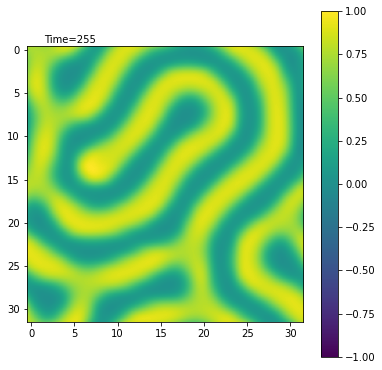

In [10]:
from matplotlib.animation import FuncAnimation
from tqdm import tqdm

fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])


title = ax.text(1.5,-0.85, "Time=0")

#im=plt.imshow((c_interp[0, :,:,0]- np.min(c_interp[0, :,:,0]))/(np.max(c_interp[0, :,:,0]) - np.min(c_interp[0, :,:,0])))#  ,interpolation='none')
im=plt.imshow((c[0, :,:,0]- np.min(c[0, :,:,0]))/(np.max(c[0, :,:,0]) - np.min(c[0, :,:,0])))#  ,interpolation='none')
fig.colorbar(im)
plt.clim(-1, 1)
pbar = tqdm(total=len(t))

def init():
    im.set_data((c_interp[0, :,:,0]- np.min(c_interp[0, :,:,0]))/(np.max(c_interp[0, :,:,0]) - np.min(c_interp[0, :,:,0])))
    #im.set_data(c[0, :,:,0])
    title.set_text(f"Time={0}")
    plt.clim(-1, 1)
    return [im, title]
    
def animate(i):    
    a=im.get_array()
    a=c_interp[0, :,:,i] 
    im.set_data((c_interp[0, :,:,i]- np.min(c_interp[0, :,:,i])) /(np.max(c_interp[0, :,:,i]) - np.min(c_interp[0, :,:,i])))
    #im.set_data(c[0, :,:,i])
    title.set_text(f"Time={i}")
    plt.clim(-1, 1)
    #fig.colorbar(im)
    pbar.update(1)
    if i+1 >= len(t):
        pbar.close()
    return [im, title]

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(t), interval=10, blit=True)


anim.save('turring_estimeted.gif', writer='imagemagick')

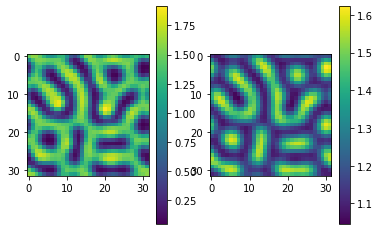

In [10]:
# Direct solution
index = -1#len(t)-1
plt.subplot(121)
plt.imshow(c[0, :,:,index])
plt.colorbar()
plt.subplot(122)
plt.imshow(c[1, :,:,index])
plt.colorbar()
#plt.title(f"Time= {index}")
plt.show()

### Making an animation

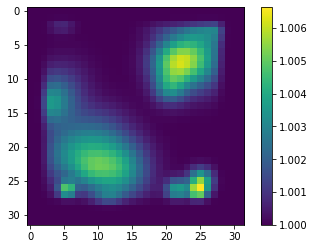

In [27]:
im= plt.imshow(c[0, :,:,0])
bar = plt.colorbar()
plt.show()

In [19]:
bar

In [ ]:
beta[0] = 0.00# sigma_a
beta[1] = 0.02217368# sigma_s
#gamma[0,0] = -0.39821332693099976/6.1620588302612305 #mu_a
#gamma[1,1] = 0.0 #mu_s
# rho_a,  rho_s, kappa_a
#f_args = (0.3968598246574402/6.1620588302612305, 0.01892107166349888, 0.25294479727745056)
f_args = (f_args[0], f_args[1], 0.19742522)

#  The best result

In [9]:
import sys, os
sys.path.append("/end/home/rh2310/morpho_repo")
data_path = os.path.abspath("../growth/turing_model_2.npy")
with open(data_path, 'rb') as f:
    data2 = np.load(f)
    
data_path = os.path.abspath("../growth/turing_t_model_2.npy")
with open(data_path, 'rb') as f:
    t_star2 = np.load(f) 

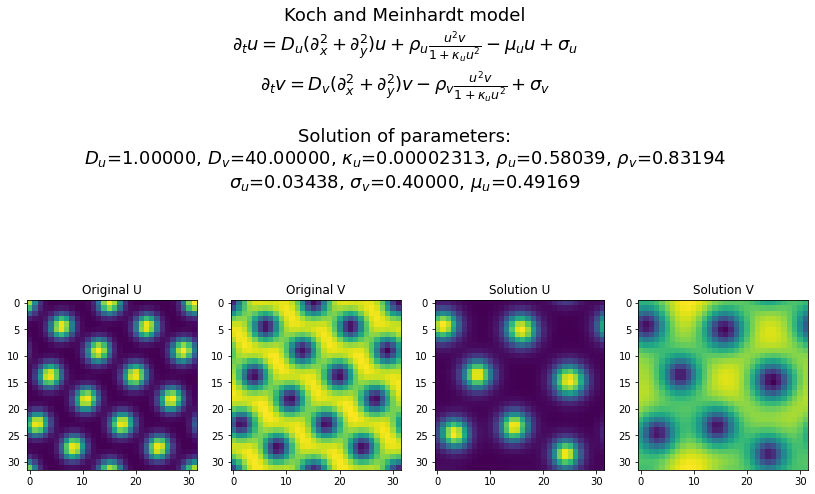

In [34]:
_ = plt.figure(figsize=(14,11))
# Direct solution
plt.suptitle("Koch and Meinhardt model\n"
             r"$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + \rho_u \frac{u^2 v}{1 + \kappa_u u^2} - \mu_u u + \sigma_u$"
             "\n"
             r"$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v - \rho_v \frac{u^2 v}{1 + \kappa_u u^2} + \sigma_v$"
             "\n"
             "\n"
             "Solution of parameters:\n"             
             r"$D_u$="
             f"{D_a:.5f}"
             r", $D_v$="
             f"{D_s:.5f}"
             r", $\kappa_u$="
             f"{f_args[2]:.8f}"
             r", $\rho_u$="
             f"{f_args[0]:.5f}"
             r", $\rho_v$="
             f"{f_args[1]:.5f}"
             "\n"
             r"$\sigma_u$="
             f"{beta[0]:.5f}"
             r", $\sigma_v$="
             f"{beta[1]:.5f}"
             r", $\mu_u$="
             f"{-gamma[0,0]:.5f}", fontsize=18)
plt.subplot(141)
plt.title("Original U")
plt.imshow(data2[0, :,:,-1])
plt.subplot(142)
plt.title("Original V")
plt.imshow(data2[1, :,:,-1])

plt.subplot(143)
plt.title("Solution U")
plt.imshow(c[0, :,:,-1])
plt.subplot(144)
plt.title("Solution V")
plt.imshow(c[1, :,:,-1])
plt.show()

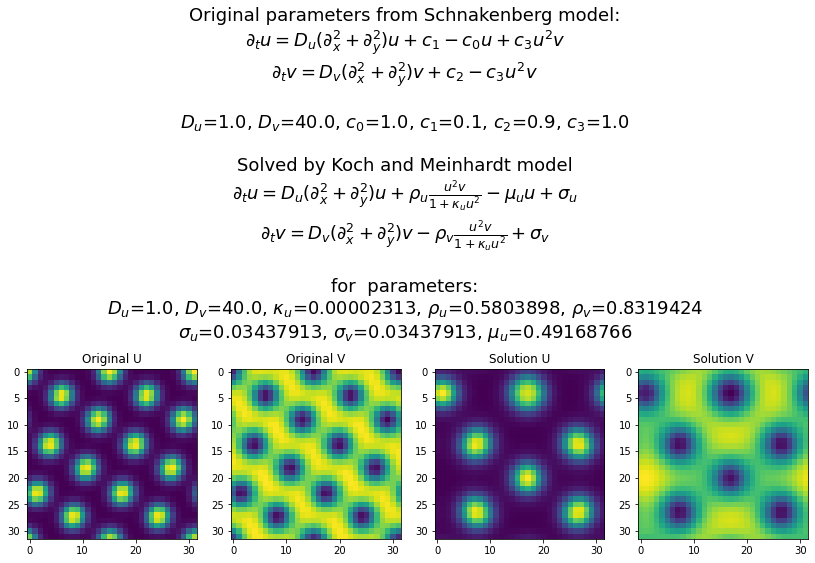

In [34]:
_ = plt.figure(figsize=(14,13))
# Direct solution
plt.suptitle(             "Original parameters from Schnakenberg model:\n"
             r"$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + c_1 -c_0 u + c_3u^2v$"
             "\n"
             r"$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + c_2 -c_3 u^2 v$"
             "\n"
             "\n"
             r"$D_u$=1.0, $D_v$=40.0, $c_0$=1.0, $c_1$=0.1, $c_2$=0.9, $c_3$=1.0"
             "\n"
             "\n"
             "Solved by Koch and Meinhardt model\n"
             r"$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + \rho_u \frac{u^2 v}{1 + \kappa_u u^2} - \mu_u u + \sigma_u$"
             "\n"
             r"$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v - \rho_v \frac{u^2 v}{1 + \kappa_u u^2} + \sigma_v$"
             "\n"
             "\n"
             "for  parameters:\n"             
             r"$D_u$=1.0, $D_v$=40.0, $\kappa_u$=0.00002313, $\rho_u$=0.5803898, $\rho_v$=0.8319424"
             "\n"
             r"$\sigma_u$=0.03437913, $\sigma_v$=0.03437913, $\mu_u$=0.49168766"
             , fontsize=18)

plt.subplot(141)
plt.title("Original U")
plt.imshow(data2[0, :,:,-1])
plt.subplot(142)
plt.title("Original V")
plt.imshow(data2[1, :,:,-1])

plt.subplot(143)
plt.title("Solution U")
plt.imshow(c[0, :,:,-1])
plt.subplot(144)
plt.title("Solution V")
plt.imshow(c[1, :,:,-1])

plt.show()

In [49]:
0.0016/0.0131

0.12213740458015267

In [9]:
0.0016/0.006

0.26666666666666666

In [50]:
D[0]/D[1]

0.024999999999999998

In [47]:
D[0]/0.0016

3.125

In [48]:
D[1]/0.0131

15.267175572519085

In [26]:
D[1]#*3

0.2

In [51]:
D_a_orig = D[0]
D_s_orig = D[1]

In [24]:
# Load a standard ASDM model
D, beta, gamma, f, f_args, homo_ss = rdsolver.models.asdm()

# Set up the space and time grid
n = (32, 32)
L = (1.0, 1.0)
t = np.linspace(0, 50000, 256)
       
const_a = 1#/3.0#D[0]/0.0016
const_s = 1#/3.0#D[1]/0.0131

# # Include the estimated params
# D_a = 0.0005405135#0.01558*const1#0.005
# D_s = 0.0018252016#0.03886*const2#0.2
D[0] = D[0]/2#/const_a # D_a
D[1] = D[1]/1#512#const_s # D_s
beta[0] = 0.0#beta[0]/const_a#0.8086711218#0.00040#0.00097*const1# sigma_a
beta[1] = 7.2589268531#beta[1]/const_s#0.3703759794#0.3837675302024302#0.01521#0.00345*const2 # sigma_s
gamma[0,0] = -1.7123495954#gamma[0,0]/const_a#-1.7321828529#-0.01046#-0.03316*const1#mu_a
# #gamma[1,1] = 0.0 #mu_s
# # rho_a,  rho_s, kappa_a
# #f_args = (0.03253*const1, 0.00374*const2, 0.25216)
# #f_args = (0.00997, 0.01615, 0.25453)
f_args = (0.1416368231 , 0.1175335969, 0.0022644255)
#f_args = (f_args[0]/const_a, f_args[1]/const_s, 0)


# Initial condition and solve
#c0 = rdsolver.initial_condition(uniform_conc=homo_ss, n=n, L=L)
with open('../turing_Brusselator.npy', 'rb') as file:
    data = np.load(file)

c0 = data[:,:,:, 0]
c = rdsolver.solve(c0, t, D=D, beta=beta, gamma=gamma, f=f, f_args=f_args, L=L)

# Interpolate the solution
#c_interp = rdsolver.viz.interpolate_concs(c)

100%|██████████| 256/256 [37:39<00:00,  8.82s/it]


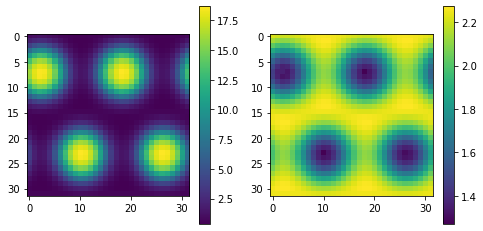

In [25]:
index = -1#len(t)-1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(c[0, :,:,index])
plt.colorbar()
plt.subplot(122)
plt.imshow(c[1, :,:,index])
plt.colorbar()
#plt.title(f"Time= {index}")
plt.show()

In [10]:
# Load a standard ASDM model
D, beta, gamma, f, f_args, homo_ss = rdsolver.models.asdm()

# Set up the space and time grid
n = (32, 32)
L = (1.0, 1.0)
t = np.linspace(0, 100, 256)
      
const_a = 1#/3.0#D[0]/0.0016
const_s = 1#/3.0#D[1]/0.0131
 
# # Include the estimated params
# D_a = 0.0005405135#0.01558*const1#0.005
# D_s = 0.0018252016#0.03886*const2#0.2
D[0] = D[0]/2#/const_a # D_a
D[1] = D[1]/1#512#const_s # D_s
beta[0] = 0.0000000000#beta[0]/const_a#0.8086711218#0.00040#0.00097*const1# sigma_a
beta[1] = 5.818247743#beta[1]/const_s#0.3703759794#0.3837675302024302#0.01521#0.00345*const2 # sigma_s
gamma[0,0] = -1.5041211452#gamma[0,0]/const_a#-1.7321828529#-0.01046#-0.03316*const1#mu_a
# #gamma[1,1] = 0.0 #mu_s
# # rho_a,  rho_s, kappa_a
# #f_args = (0.03253*const1, 0.00374*const2, 0.25216)
# #f_args = (0.00997, 0.01615, 0.25453)
f_args = (0.1222011685 , 0.0917081877, 0.0020346792)
#f_args = (f_args[0]/const_a, f_args[1]/const_s, 0)


# Initial condition and solve
#c0 = rdsolver.initial_condition(uniform_conc=homo_ss, n=n, L=L)
with open('../turing_Brusselator.npy', 'rb') as file:
    data = np.load(file)

c0 = data[:,:,:, 0]
c = rdsolver.solve(c0, t, D=D, beta=beta, gamma=gamma, f=f, f_args=f_args, L=L)

# Interpolate the solution
#c_interp = rdsolver.viz.interpolate_concs(c)

100%|██████████| 256/256 [00:07<00:00, 33.74it/s]


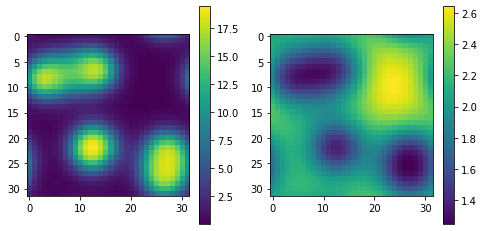

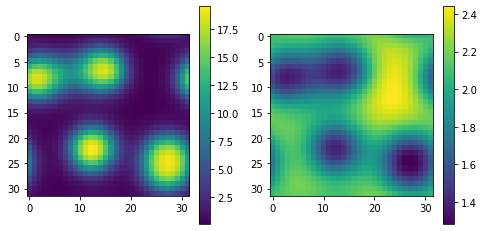

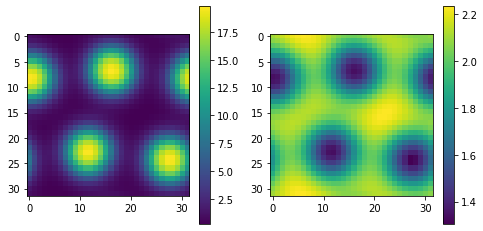

In [13]:
index = 100#len(t)-1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(c[0, :,:,index])
plt.colorbar()
plt.subplot(122)
plt.imshow(c[1, :,:,index])
plt.colorbar()
#plt.title(f"Time= {index}")
plt.show()

index = 150#len(t)-1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(c[0, :,:,index])
plt.colorbar()
plt.subplot(122)
plt.imshow(c[1, :,:,index])
plt.colorbar()
#plt.title(f"Time= {index}")
plt.show()

index = -1#len(t)-1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(c[0, :,:,index])
plt.colorbar()
plt.subplot(122)
plt.imshow(c[1, :,:,index])
plt.colorbar()
#plt.title(f"Time= {index}")
plt.show()

In [44]:
# Load a standard ASDM model
D, beta, gamma, f, f_args, homo_ss = rdsolver.models.asdm()

factor = 32
const_s = const_a = .25#/3.0#D[0]/0.0016
#const_s = 2#/3.0#D[1]/0.0131
# Set up the space and time grid
n = (32, 32)
L = (np.sqrt(const_s)*32.0/np.sqrt(factor), 
     np.sqrt(const_s)*32.0/np.sqrt(factor))
t = np.linspace(0, const_s*32000, 256)
      
# # Include the estimated params
# D_a = 0.0005405135#0.01558*const1#0.005
# D_s = 0.0018252016#0.03886*const2#0.2
D[0] = D[0]/factor#/const_a # D_a
D[1] = D[1]/factor#512#const_s # D_s
beta[0] = beta[0]/const_a# sigma_a
beta[1] = beta[1]/const_s# sigma_s
gamma[0,0] = gamma[0,0]/const_a# mu_a
# rho_a,  rho_s, kappa_a
f_args = (f_args[0]/const_a, f_args[1]/const_s, 0)


#c0 = rdsolver.initial_condition(uniform_conc=homo_ss, n=n, L=L)
c = rdsolver.solve(c0, t, D=D, beta=beta, gamma=gamma, f=f, f_args=f_args, L=L)

# Interpolate the solution
#c_interp = rdsolver.viz.interpolate_concs(c)

100%|██████████| 256/256 [00:17<00:00, 14.46it/s]


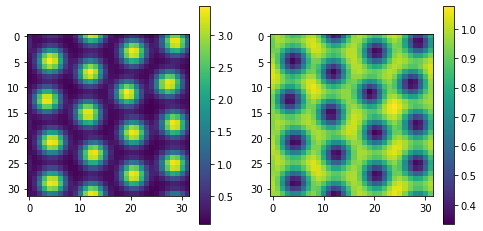

In [45]:
index = 100#len(t)-1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(c[0, :,:,index])
plt.colorbar()
plt.subplot(122)
plt.imshow(c[1, :,:,index])
plt.colorbar()
#plt.title(f"Time= {index}")
plt.show()

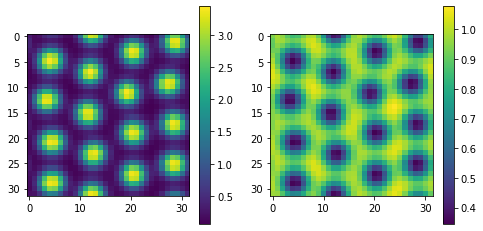

In [19]:
index = 100#len(t)-1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(c[0, :,:,index])
plt.colorbar()
plt.subplot(122)
plt.imshow(c[1, :,:,index])
plt.colorbar()
#plt.title(f"Time= {index}")
plt.show()

In [13]:
0.02/0.4

0.049999999999999996

In [11]:
# Load a standard ASDM model
D, beta, gamma, f, f_args, homo_ss = rdsolver.models.asdm()

factor = 32
const_s = const_a = 1#.25#/3.0#D[0]/0.0016
#const_s = 2#/3.0#D[1]/0.0131
# Set up the space and time grid
n = (32, 32)
L = (32.0, 32.0)
t = np.linspace(0, 32000, 256)

# # Include the estimated params
# D_a = 0.0005405135#0.01558*const1#0.005
# D_s = 0.0018252016#0.03886*const2#0.2
D[0] = 0.02#D[0]/factor#/const_a # D_a
D[1] = 0.4#D[1]/factor#512#const_s # D_s
#beta[0] = 0.0#beta[0]/const_a# sigma_a
#beta[1] = 0.11657#beta[1]/const_s# sigma_s
#gamma[0,0] = -0.04318#gamma[0,0]/const_a# mu_a
# rho_a,  rho_s, kappa_a
f_args = (f_args[0]/const_a, f_args[1]/const_s, 0)
#f_args = (0.00369, 0.00221, 0.00196)

with open('../turing_Brusselator.npy', 'rb') as file:
    data = np.load(file)

c0 = data[:,:,:, 0]

#c0 = rdsolver.initial_condition(uniform_conc=homo_ss, n=n, L=L)
c = rdsolver.solve(c0, t, D=D, beta=beta, gamma=gamma, f=f, f_args=f_args, L=L)

# Interpolate the solution
#c_interp = rdsolver.viz.interpolate_concs(c)

100%|██████████| 256/256 [00:13<00:00, 19.55it/s]


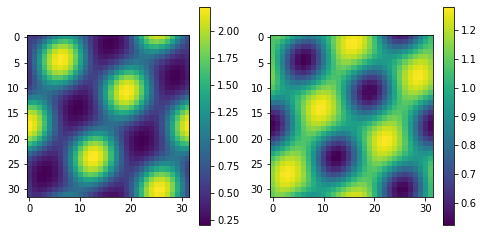

In [12]:
index = -1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(c[0, :,:,index])
plt.colorbar()
plt.subplot(122)
plt.imshow(c[1, :,:,index])
plt.colorbar()
#plt.title(f"Time= {index}")
plt.show()

In [74]:
import sys
sys.path.append("/end/home/rh2310/morpho_repo/turing_codebase")
from solvers.explicit_Euler import integrate
from solvers.turing_models import Koch_Meinhardt

In [90]:
n = (32, 32)
L = (32.0, 32.0)

Ds = np.array([0.02, 0.4])
sigma_u=0.00836
sigma_v=0.11373
mu_u=0.05025
rho_u=0.00386 
rho_v=0.00210
kappa_u=0.00074 

f_args = (sigma_u, sigma_v, rho_u, rho_v, kappa_u, mu_u)

with open('../turing_Brusselator.npy', 'rb') as file:
    data = np.load(file)

c0 = data[:,:,:, 0]

t = np.linspace(0, 20000, 256)

dt = 0.1

sol = integrate(c0, t, dt, n, L, Ds, Koch_Meinhardt, f_args)

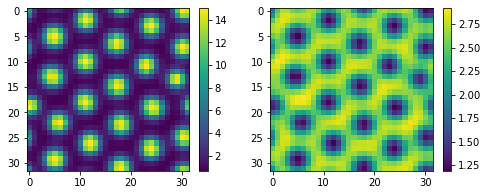

In [91]:
index = -1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(sol[0,:,:, index])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol[1,:,:, index])
plt.colorbar(shrink=.75)
plt.show()

In [17]:
# Load a standard ASDM model
D, beta, gamma, f, f_args, homo_ss = rdsolver.models.asdm()

# Set up the space and time grid
n = (100, 100)
L = (10, 10)
t = np.linspace(0, 350, 351)

# Include the estimated params
D_a = 0.1#0.01558*const1#0.005
D_s = 1.0#0.03886*const2#0.2
D[0] = D_a # D_a
D[1] = D_s # D_s
beta[0] =  0.1#0.15#0.00040#0.00097*const1# sigma_a
beta[1] = 1.0#0.2#0.3837675302024302#0.01521#0.00345*const2 # sigma_s
gamma[0,0] = -1.0#-0.01046#-0.03316*const1#mu_a
#gamma[1,1] = 0.0 #mu_s
# rho_a,  rho_s, kappa_a
#f_args = (0.03253*const1, 0.00374*const2, 0.25216)
#f_args = (0.00997, 0.01615, 0.25453)
f_args = (1.0, 1.25, 0.0)
#f_args = (f_args[0], f_args[1], 0.19742522)

# Initial condition and solve
c0 = rdsolver.initial_condition(uniform_conc=homo_ss, n=n, L=L)
c = rdsolver.solve(c0, t, D=D, beta=beta, gamma=gamma, f=f, f_args=f_args, L=L)

# Interpolate the solution
#c_interp = rdsolver.viz.interpolate_concs(c)

100%|████████████████████████████████████████████████████████████████████████████████████████| 351/351 [01:10<00:00,  4.98it/s]


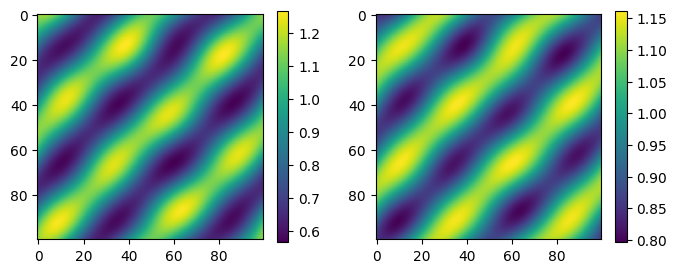

In [26]:
index = -60
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(c[0,:,:, index])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(c[1,:,:, index])
plt.colorbar(shrink=.75)
plt.show()